**Exam3: MATH 425/625 Numerical Analysis**

**Ben Moss**


**Question 1:** Derive the approximation and the *simplified* error term for adaptive quadrature integration with the Trapezoidal rule. Write a Python to program to implement this method using *recursive* function calls and apply your code to approximate $\int_0^3 4 x \cos(2x) - (x - 2)^2$ within $\epsilon = 10^{-5}$ tolerance. Plot the selected partitions on the function.

**Solution:** We begin by deriving the composite trapezoid rule, then we develop the adaptive quadrature for this result. First, the trapezoid rule is given by 
\begin{align*}
\int_{a}^{b}f(x)dx&=\dfrac{h}{2}\bigg[f(x_{0})+f(x_{1})\bigg]-\dfrac{h^3}{12}f''(\xi)\\
&=\dfrac{h}{2}\bigg[f(a)+f(b)\bigg]-\dfrac{h^3}{12}f''(\xi).
\end{align*}

So then 
\begin{align*}
\int_{a}^{b}f(x)dx&=\int_{x_0}^{x_1}f(x)dx+\int_{x_1}^{x_2}f(x)dx+\cdots+\int_{x_{n-1}}^{x_n}f(x)dx.\\
&\approx h\dfrac{f(x_0)+f(x_1)}{2}+h\dfrac{f(x_1)+f(x_2)}{2}+\cdots+h\dfrac{f(x_{n-1})+f(x_{n})}{2}.
\end{align*}

We are left summing over these contributions and we arrive at a closed-form solution
\begin{align*}
\int_{a}^{b}f(x)dx&\approx h\bigg[\dfrac{1}{2}f(x_0)+\sum_{i=1}^{n-1}f(x_{i})+\dfrac{1}{2}f(x_n)\bigg] - h^2\dfrac{b-a}{12}f^{(2)}(\xi),
\end{align*}
where we have appended the error term for good measure. 

We will now derive the adaptive quadrature for the composite trapezoid rule. We have $$h=b-a$$ and $$\int_{a}^{b}f(x)dx=\underbrace{\dfrac{h}{2}\bigg[f(a)+2f(a+h)+f(b)\bigg]-\dfrac{h^3}{12}f^{(2)}(\xi)}_{T(a,b)}.$$

We define a new variable $h^{*}=\dfrac{b-a}{2}=\dfrac{h}{2}.$ Then we have that 
\begin{align*}
\int_{a}^{b}f(x)dx&=\dfrac{h^{*}}{2}\bigg[f(a)+2f(a+2h^{*})+f(b)\bigg]-{h^{*}}^2\bigg(\dfrac{b-a}{24}\bigg)f^{(2)}(\xi)\\
&= \dfrac{h}{4}\bigg[f(a)+2f(a+h)+f(b)\bigg]-\bigg(\dfrac{h}{2}\bigg)^2\bigg(\dfrac{b-a}{24}\bigg)f^{(2)}(\xi)\\
&=\bigg[T(a,h),\,T(h,b)\bigg]-\dfrac{1}{4}\dfrac{h^3}{12}f^{(2)}(\xi)\\
&\Rightarrow \dfrac{h^3}{12}f^{(2)}(\xi)=\dfrac{4}{3}\bigg[T\bigg(a,\,\frac{a+b}{2}\bigg)+T\bigg(\frac{a+b}{2},\,b\bigg)-T(a,b)\bigg].
\end{align*}




This implies if $$\Bigg\lvert\,T(a,b)-\bigg(T\bigg(a,\,\frac{a+b}{2}\bigg)+T\bigg(\frac{a+b}{2},\,b\bigg)\bigg)\,\Bigg\rvert<3\epsilon$$ which implies 
$$\int f(x), \bigg[T\bigg(\frac{a+b}{2},\,b\bigg)+T\bigg(a,\,\frac{a+b}{2},\bigg)\bigg]<\epsilon.$$

Now we will program this algorithm.

In [235]:
import tensorflow as tf
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [236]:
def T(a, b, f):
    h = (b - a)
    I = (h / 2.0)  * (f(a) + f(b))
    
    return I

In [237]:
def adaptive_trap(a, b, f, e):
    global p
    I = T(a, b, f)
    I1 = T(a, (a + b) / 2.0, f)
    I2 = T((a + b) / 2.0, b, f)
    p.append((a+b)/2)
    if(abs(I - (I1 + I2)) < 3 * e):
        return (I1 + I2)
    
    I1 = adaptive_trap(a, (a + b) / 2, f, e/2)
    I2 = adaptive_trap((a + b) / 2, b, f, e/2)
    
    return (I1 + I2)

In [238]:
a = 0 
b = 3
e = 1e-5

p = [a,b]
g = lambda x: 4 * x * np.cos(2*x) - (x - 2) ** 2

y = adaptive_trap(a, b, g , e)

In [239]:
print(p)

[0, 3, 1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.0234375, 0.01171875, 0.005859375, 0.0029296875, 0.0087890625, 0.017578125, 0.0146484375, 0.0205078125, 0.03515625, 0.029296875, 0.0263671875, 0.0322265625, 0.041015625, 0.0380859375, 0.0439453125, 0.0703125, 0.05859375, 0.052734375, 0.0498046875, 0.0556640625, 0.05419921875, 0.05712890625, 0.064453125, 0.0615234375, 0.06005859375, 0.06298828125, 0.0673828125, 0.06591796875, 0.06884765625, 0.08203125, 0.076171875, 0.0732421875, 0.07177734375, 0.07470703125, 0.0791015625, 0.07763671875, 0.08056640625, 0.087890625, 0.0849609375, 0.08349609375, 0.08642578125, 0.0908203125, 0.08935546875, 0.09228515625, 0.140625, 0.1171875, 0.10546875, 0.099609375, 0.0966796875, 0.09521484375, 0.09814453125, 0.1025390625, 0.10107421875, 0.10400390625, 0.111328125, 0.1083984375, 0.10693359375, 0.10986328125, 0.1142578125, 0.11279296875, 0.11572265625, 0.12890625, 0.123046875, 0.1201171875, 0.11865234375, 0.12158203125, 0.1259765625, 0.12451171875, 0.12744

In [240]:
len(p)

2899

In [241]:
approx = adaptive_trap(0, 3, g, 1e-5)
print(approx)


-4.716323532015858


This approximation agrees exactly within 5 significant figures to the solution from an online computational engine. 

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

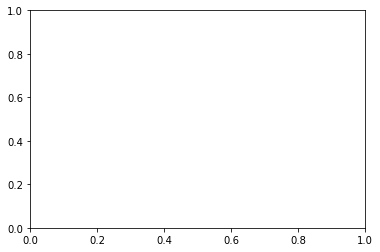

In [242]:
fig, ax = plt.subplots()

x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 50)

ax.plot(x, y)
ax.plot(p, g(p), color = 'r', ls = '', marker = 'o')

Still having graphing difficulties.


**Question 2:** Consider the initial value problem (IVP):

$$
y'=f(t,y), \;\;\; a \leq t \leq b, \;\;\; y(a) = \alpha.
$$

Devise an iterative algorithm for solving the IVP as follows: Let $y_{0}(t)=\alpha$ for each $t$ in $[a,b]$. Define
a sequence ${y_{k}(t)}$ of functions by

$$
y_{k}(t) = \alpha + \int_{a}^{t} f(s, y_{k-1}(s)) ds, \;\;\; k=1,2,\cdots .
$$

1. Integrate $y'=f(t,y(t))$, and use the initial condition to derive the recursion as stated above.
2. Write a `Python` code to generate $y_{n}$ for a given integer $n$. Use Composite Simpson's rule to compute the integral.
3. Apply the code to 

$$
y' = -y + t + 1, \;\;\; 0 \leq t \leq 1, \;\;\; y(0) = 1,
$$

and plot the approximated solution and compare it the exact solution (overlay the plots and also plot the abs of the difference). 

**Solution (Part 1):** If we integrate $y'$ we are going to have the following: 

\begin{align*}
\int_{a}^{b}y'dt&=\int_{a}^{b}f(t,y)dt\\
&\text{Make a change of variables}\,s=t\Rightarrow\,ds=dt\,\,\,\,y_{1}(s)=t_{1}-t_{0}=t_{1}-a \Rightarrow y_{n}(s)=t_{n}-t_{n-1}\\
&\text{We are ready to proceed, we have}\\
\int_{a}^{b}f(t,y)dt&=\int_{a}^{t_{1}}f(s,\,y_{1}(s))ds+\int_{t_{1}}^{t_{2}}f(s,\,y_{2}(s))ds+\cdots+\int_{t_{n-2}}^{t_{n-1}}f(s,\,y_{n-1}(s))ds+\int_{t_{n-1}}^{t_{n}}f(s,\,y_{n}(s))ds,
\end{align*}
For $k=0$ the integral computed from this is evaluating bounds from $a$ to $a$, which is of course trivial, and becomes $0$, therefore it must be so that $y(a)=\alpha$ and $y_{0}(t)=\alpha$ holds. So we are left with 
\begin{align*}
\int_{a}^{b}y'dt&=\int_{a}^{b}f(t,y)dt=\alpha + \int_{a}^{t_{1}}f(s,\,y_{1}(s))ds+\int_{t_{1}}^{t_{2}}f(s,\,y_{2}(s))ds+\cdots+\int_{t_{n-2}}^{t_{n-1}}f(s,\,y_{n-1}(s))ds+\int_{t_{n-1}}^{t_{n}}f(s,\,y_{n}(s))ds,
\end{align*}

We assume our integral is continuous over these individual parts, and therefore we may sum these parts as a whole, a classic theorem in calculus. 

Then we have 
\begin{align*}
\int_{a}^{b}y'dt&=\int_{a}^{b}f(t,y)dt=\alpha + \int_{a}^{t_{1}}f(s,\,y_{1}(s))ds+\int_{t_{1}}^{t_{2}}f(s,\,y_{2}(s))ds+\cdots+\int_{t_{n-2}}^{t_{n-1}}f(s,\,y_{n-1}(s))ds+\int_{t_{n-1}}^{t_{n}}f(s,\,y_{n}(s))ds\\
&=\alpha + \int_{a}^{t}f(s,\,y_{k-1}(s))ds\,\text{for}\,k\in\{1,\dots,n\}.
\end{align*}
Thus, the result follows. $\blacksquare$

**(Part 2):** We will write a python code to generate $y_{n}$ for a given integer $n$, and we will use composite Simpson's rule to evaluate the integral. 

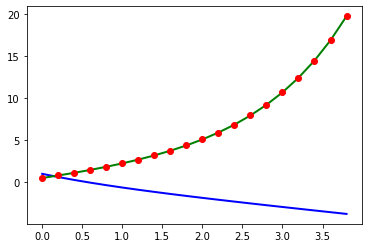

In [243]:
def euler(a, b, alpha, n, f):
    h = (b-a) / n
    t = np.zeros(n)
    w = np.zeros(n)
    t[0] = a
    w[0] = alpha
    
    for i in range(1,n):
        t[i] = a + i * h
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
    
    
    return t, w

def f(t, y):
    return y - t + 1

def y(t):
    return np.exp(-t)-t

a = 0
b = 4
alpha = 0.5
n = 20

t, w = euler(a, b, alpha, n, f)
y_exact = y(t) 

fig, ax = plt.subplots() 
    
    
ax.plot(t, y_exact, color = 'blue', lw = 2, ls = '-')
ax.plot(t, w, color = 'green', lw = 2, ls = '-')
ax.plot(t, w, color = "red", marker = 'o', ls = '')

**(Part 3):** This is D'Alembert's equation, we can solve it exactly as follows: 
\begin{align*}
0 &= y' + y - t - 1 \\
& \text{add $t+1$ to both sides}\\
& (t+1) = y' + y\\
&\text{Let $\mu(t)=e^{\int dt}=e^t$, we have}\\
e^{t}\dfrac{dy(t)}{dt}+e^{t}&=-e^{t}(-t-1)\\
\bigg(e^{t}y(t)\bigg)'&=-e^{t}(-t-1)\\
&\text{integrate both sides and we have}\\
e^{t}y(t) &= \int -e^{t}(-t-1) dt \\
y(t) &= \dfrac{\int te^t + \int e^t}{e^t} \\
y(t) &= \dfrac{te^t-\int e^t+e^t+K}{e^t}\\
y(t) &=  \dfrac{te^{t-t}+Ce^{-t}}{1}\\
&\text{where we have done integration by parts and combined constants of integration, we have}\\
y(t) &= Ce^{-t}+t
\end{align*}
Using our initial condition $y(0)=1$ we know $C=1$. Thus, our solution is 
$$y(t)=e^{-t}+t$$ 
We graph this solution and we have

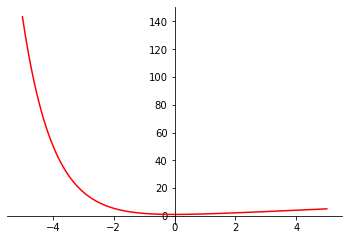

In [244]:
x = np.linspace(-5,5,100)

y = np.exp(-x)+x

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y, 'r')

plt.show()

In [245]:
def S(a, b, f):
    h = (b - a) / 2.0
    I = (h / 3.0) * (f(a) + 4 * f(a + h) +f(b))
    
    return I

In [246]:
def adaptive_simp(a, b, f, e):
    global p
    I = S(a, b, f)
    I1 = S(a, (a + b) / 2.0, f)
    I2 = S((a + b) / 2.0, b, f)
    p.append((a+b)/2)
    if(abs(I - (I1 + I2)) < 15 * e):
        return (I1 + I2)
    
    I1 = adaptive_simp(a, (a + b) / 2, f, e/2)
    I2 = adaptive_simp((a + b) / 2, b, f, e/2)
    
    return (I1 + I2)

In [247]:
a = 0 
b = 100 
e = 1e-8
r = lambda x: np.exp(-x)+x

p = [a,b]
q = adaptive_simp(a, b, r, e)

ValueError: x and y must have same first dimension, but have shapes (100,) and (247,)

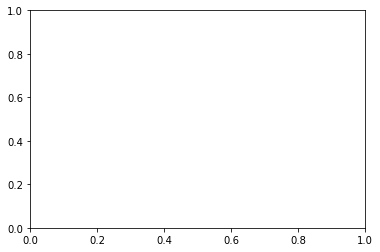

In [249]:
fig, ax = plt.subplots()

plt.plot(x,p, 'r')
ax.plot(p, q(p), color = 'r', ls = '', marker = 'o')
plt.show()

**Question 3:** Implement a `TensorFlow` program to perform the following analysis.
1. Simulate a data set of $50$ points with $x \in [-5, 5]$, and $y = -1.2 x^2 + 3.1 x - 0.2$.
2. Add white Gaussian noise to $y$ with mean $=0$ and std = $5$ to generate a noisy `y_noise` vector.
3. Plot the actual `y` curve and overlay a scatter plot of `y_noise`.
4. Define an appropriate Objective functions with `TensorFlow` for fitting i) linear and ii) quadratic polynomials to the simulated data.
5. Optimize the objective function using Adam optimizer with learning rate $0.01$ and $10,000$ epochs. Print out the fitted value for model parametes (both linear and quadratic) and compare to actual coefficients. 
6. Plot the fitted `y` curves (linear and quadratic) and overlay a scatter plot of `y_noise`.
10. (Graduate Students) Repeat the fitting process, but this time use `GradientTape()` to implement a simple Steepest Descent algorithm for taking steps toward the min value. Print out the fitted parameter values and compare with Adam optimizer

**Solution (Part 1):** 

In [250]:
x = tf.Variable(np.array([-5.0, -4.8, -4.6, -4.4, -4.2, -4.0,
                          -3.8, -3.6, -3.4, -3.2, -3.0,
                          -2.8, -2.6, -2.4, -2.2, -2.0,
                          -1.8, -1.6, -1.4, -1.2, -1.0,
                          -0.8, -0.6, -0.4, -0.2,
                          0.2, 0.4, 0.6, 0.8, 1.0, 
                          1.2, 1.4, 1.6, 1.8, 2.0,
                          2.2, 2.4, 2.6, 2.8, 3,
                         3.2, 3.4, 3.6, 3.8, 4,
                         4.2, 4.4, 4.6, 4.8, 5.0]), dtype=tf.float32)

In [251]:
with tf.GradientTape() as tape:
    y = - 1.2 * x ** 2 + 3.1 * x - 0.2

In [252]:
y.numpy()

array([-45.7       , -42.728004  , -39.852     , -37.072002  ,
       -34.387997  , -31.800001  , -29.308002  , -26.911999  ,
       -24.612001  , -22.408     , -20.3       , -18.288     ,
       -16.372     , -14.552001  , -12.828     , -11.2       ,
        -9.667999  ,  -8.232     ,  -6.8919992 ,  -5.648     ,
        -4.5       ,  -3.4480002 ,  -2.492     ,  -1.6320001 ,
        -0.868     ,   0.37200004,   0.848     ,   1.2279999 ,
         1.5119998 ,   1.6999998 ,   1.7919998 ,   1.7879996 ,
         1.6879997 ,   1.4919996 ,   1.1999996 ,   0.8119996 ,
         0.3279994 ,  -0.25200003,  -0.9280006 ,  -1.700001  ,
        -2.568001  ,  -3.5320008 ,  -4.592     ,  -5.748001  ,
        -7.000001  ,  -8.348001  ,  -9.792002  , -11.332001  ,
       -12.968002  , -14.700002  ], dtype=float32)

**(Part 2):**

In [253]:
y_noise = y + np.random.normal(0,5,50)
print(y_noise)


tf.Tensor(
[-45.763424   -50.457306   -32.53784    -36.754597   -32.324646
 -29.953472   -28.980064   -19.426998   -19.538528   -25.492493
 -20.303654   -18.769659   -10.027473   -16.394238   -11.951291
 -14.186111    -9.408184    -7.9426517  -10.4103985   -5.020627
  -0.3756919   -6.0214653   -9.428982    -1.851692    -3.3397174
  -1.0808158    0.5140434    9.44486     -7.2195053   -1.465064
   3.1171994    1.1484854    0.59862614  -9.250457     8.047192
  -8.608415    -3.5722823    5.96359      0.50767344  -3.5153701
  -6.3485866   -0.6521623   -4.8901      -3.442561   -21.970146
  -1.3973279  -12.886814   -13.80185     -5.4883604  -18.617613  ], shape=(50,), dtype=float32)


**(Part 3):**

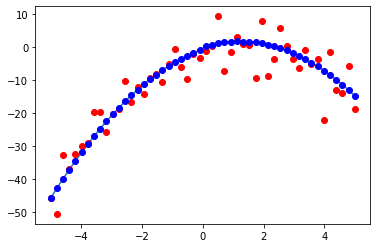

In [254]:
fig, ax = plt.subplots()

x = np.linspace(-5, 5, 50)

ax.plot(x, y)
ax.plot(x, y_noise, color = 'r', ls = '', marker = 'o')
ax.plot(x, y, color = 'b', ls = '', marker = 'o')
plt.show()


**(Part 4 and 5):**

In [255]:
j = tf.Variable(np.array([-5.0, -4.8, -4.6, -4.4, -4.2, -4.0,
                          -3.8, -3.6, -3.4, -3.2, -3.0,
                          -2.8, -2.6, -2.4, -2.2, -2.0,
                          -1.8, -1.6, -1.4, -1.2, -1.0,
                          -0.8, -0.6, -0.4, -0.2,
                          0.2, 0.4, 0.6, 0.8, 1.0, 
                          1.2, 1.4, 1.6, 1.8, 2.0,
                          2.2, 2.4, 2.6, 2.8, 3,
                         3.2, 3.4, 3.6, 3.8, 4,
                         4.2, 4.4, 4.6, 4.8, 5.0]), dtype=tf.float32)

In [256]:
with tf.GradientTape() as tape:
    z =  3 * j - 15

In [257]:
z.numpy()

array([-30.       , -29.400002 , -28.8      , -28.2      , -27.599998 ,
       -27.       , -26.4      , -25.8      , -25.2      , -24.6      ,
       -24.       , -23.4      , -22.8      , -22.2      , -21.6      ,
       -21.       , -20.4      , -19.8      , -19.2      , -18.6      ,
       -18.       , -17.4      , -16.8      , -16.2      , -15.6      ,
       -14.4      , -13.8      , -13.2      , -12.6      , -12.       ,
       -11.4      , -10.8      , -10.2      ,  -9.6      ,  -9.       ,
        -8.4      ,  -7.7999997,  -7.2000003,  -6.6000004,  -6.       ,
        -5.3999996,  -4.799999 ,  -4.200001 ,  -3.6000004,  -3.       ,
        -2.4000006,  -1.7999992,  -1.2000008,  -0.5999994,   0.       ],
      dtype=float32)

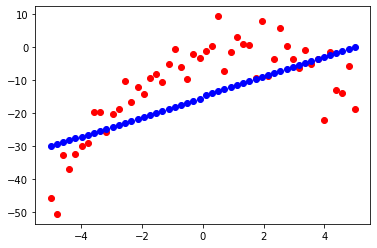

In [258]:
fig, bx = plt.subplots()

xx = np.linspace(-5, 5, 50)
yy = np.linspace(-30, 0, 50)

bx.plot(xx, y_noise, color = 'r', ls = '', marker = 'o')
bx.plot(xx, z, color = 'b', ls = '', marker = 'o')
plt.show()

In [259]:
k = tf.Variable(np.array([-5.0, -4.8, -4.6, -4.4, -4.2, -4.0,
                          -3.8, -3.6, -3.4, -3.2, -3.0,
                          -2.8, -2.6, -2.4, -2.2, -2.0,
                          -1.8, -1.6, -1.4, -1.2, -1.0,
                          -0.8, -0.6, -0.4, -0.2,
                          0.2, 0.4, 0.6, 0.8, 1.0, 
                          1.2, 1.4, 1.6, 1.8, 2.0,
                          2.2, 2.4, 2.6, 2.8, 3,
                         3.2, 3.4, 3.6, 3.8, 4,
                         4.2, 4.4, 4.6, 4.8, 5.0]), dtype=tf.float32)

In [260]:
with tf.GradientTape() as tape:
    w =  - 3 * k ** 2 - + 3 * k - 5

In [261]:
w.numpy()

array([-65.       , -59.72     , -54.68     , -49.88     , -45.32     ,
       -41.       , -36.92     , -33.079998 , -29.48     , -26.12     ,
       -23.       , -20.119999 , -17.48     , -15.08     , -12.92     ,
       -11.       ,  -9.32     ,  -7.88     ,  -6.68     ,  -5.7200003,
        -5.       ,  -4.52     ,  -4.2799997,  -4.2799997,  -4.52     ,
        -5.7200003,  -6.6800003,  -7.88     ,  -9.32     , -11.       ,
       -12.92     , -15.08     , -17.48     , -20.119999 , -23.       ,
       -26.12     , -29.480001 , -33.079998 , -36.92     , -41.       ,
       -45.32     , -49.88     , -54.679996 , -59.72     , -65.       ,
       -70.52     , -76.28     , -82.28     , -88.520004 , -95.       ],
      dtype=float32)

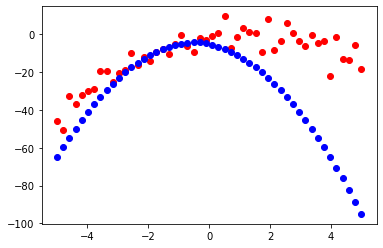

In [262]:
fig, cx = plt.subplots()

xxx = np.linspace(-5, 5, 50)
yyy = np.linspace(-65, -5, 50)

cx.plot(xxx, y_noise, color = 'r', ls = '', marker = 'o')
cx.plot(xxx, w, color = 'b', ls = '', marker = 'o')
plt.show()

In [263]:
## Using high-level API Keras for optimization
## Defining a TF array variable
X = tf.Variable(tf.random.normal(shape = [2]))

## defining the function
Z = lambda: -1.2 * (X[0] ** 2) + 3.1 * (X[1]) - 0.2


opt = tf.keras.optimizers.Adam(learning_rate = 0.01)


for _ in range(10000):
    opt.minimize(Z, var_list = X)
    print(X.numpy())

[-0.21702038  0.00285211]
[-0.22702982 -0.00714785]
[-0.23705472 -0.01714787]
[-0.24710053 -0.02714784]
[-0.25717255 -0.03714781]
[-0.26727572 -0.04714783]
[-0.27741456 -0.05714781]
[-0.28759336 -0.0671478 ]
[-0.29781613 -0.07714778]
[-0.30808657 -0.08714778]
[-0.3184081  -0.09714778]
[-0.32878384 -0.10714777]
[-0.33921668 -0.11714776]
[-0.34970927 -0.12714775]
[-0.360264   -0.13714774]
[-0.37088305 -0.14714773]
[-0.38156834 -0.15714774]
[-0.3923216  -0.16714774]
[-0.40314433 -0.17714773]
[-0.4140379  -0.18714772]
[-0.42500353 -0.19714771]
[-0.43604213 -0.2071477 ]
[-0.44715455 -0.2171477 ]
[-0.45834148 -0.22714768]
[-0.46960342 -0.23714767]
[-0.4809408  -0.24714768]
[-0.49235383 -0.25714767]
[-0.5038427  -0.26714766]
[-0.5154075  -0.27714765]
[-0.5270481  -0.28714764]
[-0.53876436 -0.29714763]
[-0.550556   -0.30714762]
[-0.5624228 -0.3171476]
[-0.5743643 -0.3271476]
[-0.58638   -0.3371476]
[-0.59846944 -0.34714758]
[-0.610632   -0.35714757]
[-0.62286705 -0.36714756]
[-0.6351739  -0.37

[-5.8401604 -3.6771445]
[-5.856508  -3.6871445]
[-5.8728538 -3.6971445]
[-5.889199  -3.7071445]
[-5.9055424 -3.7171445]
[-5.921885  -3.7271445]
[-5.9382267 -3.7371445]
[-5.954567  -3.7471445]
[-5.9709063 -3.7571445]
[-5.987244  -3.7671444]
[-6.003581  -3.7771444]
[-6.0199165 -3.7871444]
[-6.0362506 -3.7971444]
[-6.0525837 -3.8071444]
[-6.0689154 -3.8171444]
[-6.085246  -3.8271444]
[-6.1015754 -3.8371444]
[-6.117903  -3.8471444]
[-6.13423   -3.8571444]
[-6.1505556 -3.8671443]
[-6.1668797 -3.8771443]
[-6.1832027 -3.8871443]
[-6.1995244 -3.8971443]
[-6.2158446 -3.9071443]
[-6.2321634 -3.9171443]
[-6.2484813 -3.9271443]
[-6.2647977 -3.9371443]
[-6.2811127 -3.9471443]
[-6.297426  -3.9571443]
[-6.313739  -3.9671443]
[-6.33005   -3.9771442]
[-6.3463597 -3.9871442]
[-6.362668  -3.9971442]
[-6.378975  -4.0071445]
[-6.3952804 -4.0171447]
[-6.4115844 -4.027145 ]
[-6.427887 -4.037145]
[-6.4441886 -4.0471454]
[-6.460489  -4.0571456]
[-6.4767876 -4.067146 ]
[-6.493085 -4.077146]
[-6.509381  -4.08714

[-11.7160015  -7.3372207]
[-11.731729  -7.347221]
[-11.747454  -7.357221]
[-11.763177   -7.3672214]
[-11.778898   -7.3772216]
[-11.794618  -7.387222]
[-11.810335  -7.397222]
[-11.826051   -7.4072223]
[-11.841764   -7.4172225]
[-11.857476   -7.4272227]
[-11.873187  -7.437223]
[-11.888896  -7.447223]
[-11.904603   -7.4572234]
[-11.920308   -7.4672236]
[-11.936011  -7.477224]
[-11.951713  -7.487224]
[-11.967412   -7.4972243]
[-11.983109   -7.5072246]
[-11.998805  -7.517225]
[-12.014499  -7.527225]
[-12.030191   -7.5372252]
[-12.045882   -7.5472255]
[-12.061571   -7.5572257]
[-12.077258  -7.567226]
[-12.092943  -7.577226]
[-12.108626   -7.5872264]
[-12.124308   -7.5972266]
[-12.139987  -7.607227]
[-12.155664  -7.617227]
[-12.17134    -7.6272273]
[-12.187014   -7.6372275]
[-12.202686  -7.647228]
[-12.218357  -7.657228]
[-12.234026  -7.667228]
[-12.249693   -7.6772285]
[-12.265358   -7.6872287]
[-12.281021  -7.697229]
[-12.296682  -7.707229]
[-12.312342   -7.7172294]
[-12.327999   -7.7272296

[-16.99132  -10.757298]
[-17.00645  -10.767299]
[-17.02158  -10.777299]
[-17.036709 -10.787299]
[-17.051836 -10.797299]
[-17.066961 -10.8073  ]
[-17.082085 -10.8173  ]
[-17.097206 -10.8273  ]
[-17.112326 -10.8373  ]
[-17.127443 -10.847301]
[-17.142561 -10.857301]
[-17.157677 -10.867301]
[-17.17279  -10.877301]
[-17.187902 -10.887301]
[-17.203012 -10.897302]
[-17.21812  -10.907302]
[-17.233227 -10.917302]
[-17.248333 -10.927302]
[-17.263437 -10.937303]
[-17.27854  -10.947303]
[-17.29364  -10.957303]
[-17.308739 -10.967303]
[-17.323835  -10.9773035]
[-17.33893  -10.987304]
[-17.354025 -10.997304]
[-17.369118 -11.007304]
[-17.384209 -11.017304]
[-17.399298 -11.027305]
[-17.414385 -11.037305]
[-17.42947  -11.047305]
[-17.444553 -11.057305]
[-17.459637 -11.067306]
[-17.474718 -11.077306]
[-17.489798 -11.087306]
[-17.504875 -11.097306]
[-17.51995   -11.1073065]
[-17.535025 -11.117307]
[-17.550097 -11.127307]
[-17.565168 -11.137307]
[-17.580238 -11.147307]
[-17.595306 -11.157308]
[-17.610373 

[-22.088976 -14.187377]
[-22.103579 -14.197377]
[-22.11818  -14.207377]
[-22.132778 -14.217378]
[-22.147377 -14.227378]
[-22.161974 -14.237378]
[-22.176569 -14.247378]
[-22.191162 -14.257379]
[-22.205755 -14.267379]
[-22.220346 -14.277379]
[-22.234936 -14.287379]
[-22.249523  -14.2973795]
[-22.26411 -14.30738]
[-22.278696 -14.31738 ]
[-22.29328 -14.32738]
[-22.307861 -14.33738 ]
[-22.322443 -14.347381]
[-22.337023 -14.357381]
[-22.3516   -14.367381]
[-22.366177 -14.377381]
[-22.380753 -14.387382]
[-22.395327 -14.397382]
[-22.409899 -14.407382]
[-22.424469 -14.417382]
[-22.43904  -14.427382]
[-22.453608 -14.437383]
[-22.468174 -14.447383]
[-22.482738 -14.457383]
[-22.497303 -14.467383]
[-22.511866 -14.477384]
[-22.526426 -14.487384]
[-22.540985 -14.497384]
[-22.555544 -14.507384]
[-22.5701   -14.517385]
[-22.584656 -14.527385]
[-22.599209 -14.537385]
[-22.613762 -14.547385]
[-22.628313 -14.557385]
[-22.642862 -14.567386]
[-22.65741  -14.577386]
[-22.671957 -14.587386]
[-22.686502 -14.59

[-27.228682 -17.767458]
[-27.242804 -17.777458]
[-27.256924 -17.787458]
[-27.271042 -17.797459]
[-27.28516  -17.807459]
[-27.299276 -17.81746 ]
[-27.31339 -17.82746]
[-27.327505 -17.83746 ]
[-27.341618 -17.84746 ]
[-27.355728 -17.85746 ]
[-27.369839 -17.86746 ]
[-27.383947 -17.87746 ]
[-27.398054 -17.88746 ]
[-27.41216 -17.89746]
[-27.426266 -17.907461]
[-27.440369 -17.917461]
[-27.454472 -17.927462]
[-27.468573 -17.937462]
[-27.482672 -17.947462]
[-27.49677  -17.957462]
[-27.510868 -17.967463]
[-27.524963 -17.977463]
[-27.539059 -17.987463]
[-27.553152 -17.997463]
[-27.567245 -18.007463]
[-27.581337 -18.017464]
[-27.595427 -18.027464]
[-27.609516 -18.037464]
[-27.623604 -18.047464]
[-27.63769  -18.057465]
[-27.651775 -18.067465]
[-27.66586  -18.077465]
[-27.679941 -18.087465]
[-27.694023 -18.097466]
[-27.708103 -18.107466]
[-27.722181 -18.117466]
[-27.73626  -18.127466]
[-27.750336 -18.137466]
[-27.76441  -18.147467]
[-27.778484 -18.157467]
[-27.792557 -18.167467]
[-27.806627 -18.1774

[-32.098103 -21.267538]
[-32.111816 -21.277538]
[-32.125526 -21.287539]
[-32.139236 -21.297539]
[-32.152946 -21.307539]
[-32.166656 -21.31754 ]
[-32.180363 -21.32754 ]
[-32.19407 -21.33754]
[-32.207775 -21.34754 ]
[-32.221478 -21.35754 ]
[-32.23518 -21.36754]
[-32.248882 -21.37754 ]
[-32.262585 -21.38754 ]
[-32.276283 -21.397541]
[-32.28998  -21.407541]
[-32.30368  -21.417542]
[-32.317375 -21.427542]
[-32.33107  -21.437542]
[-32.344765 -21.447542]
[-32.35846  -21.457542]
[-32.37215  -21.467543]
[-32.38584  -21.477543]
[-32.399532 -21.487543]
[-32.41322  -21.497543]
[-32.426907 -21.507544]
[-32.440594 -21.517544]
[-32.45428  -21.527544]
[-32.467964 -21.537544]
[-32.481647 -21.547544]
[-32.49533  -21.557545]
[-32.50901  -21.567545]
[-32.52269  -21.577545]
[-32.53637  -21.587545]
[-32.55005  -21.597546]
[-32.563725 -21.607546]
[-32.5774   -21.617546]
[-32.591076 -21.627546]
[-32.604748 -21.637547]
[-32.61842  -21.647547]
[-32.63209  -21.657547]
[-32.645763 -21.667547]
[-32.65943  -21.6775

[-36.76727  -24.717617]
[-36.780632 -24.727617]
[-36.793995 -24.737617]
[-36.807354 -24.747618]
[-36.820713 -24.757618]
[-36.834072 -24.767618]
[-36.84743  -24.777618]
[-36.860786 -24.787619]
[-36.87414  -24.797619]
[-36.887497 -24.80762 ]
[-36.900852 -24.81762 ]
[-36.914204 -24.82762 ]
[-36.927555 -24.83762 ]
[-36.940907 -24.84762 ]
[-36.954258 -24.85762 ]
[-36.967606 -24.86762 ]
[-36.980953 -24.87762 ]
[-36.9943  -24.88762]
[-37.00765  -24.897621]
[-37.020992 -24.907621]
[-37.034336 -24.917622]
[-37.04768  -24.927622]
[-37.061024 -24.937622]
[-37.074364 -24.947622]
[-37.087704 -24.957623]
[-37.101044 -24.967623]
[-37.114384 -24.977623]
[-37.12772  -24.987623]
[-37.141056 -24.997623]
[-37.154392 -25.007624]
[-37.16773  -25.017624]
[-37.18106  -25.027624]
[-37.194393 -25.037624]
[-37.207726 -25.047625]
[-37.221058 -25.057625]
[-37.234386 -25.067625]
[-37.247715 -25.077625]
[-37.261044 -25.087626]
[-37.274372 -25.097626]
[-37.287697 -25.107626]
[-37.30102  -25.117626]
[-37.314346 -25.12

[-41.649597 -28.417702]
[-41.662632 -28.427702]
[-41.675667 -28.437702]
[-41.6887   -28.447702]
[-41.701736 -28.457703]
[-41.714767 -28.467703]
[-41.7278   -28.477703]
[-41.74083  -28.487703]
[-41.75386  -28.497704]
[-41.76689  -28.507704]
[-41.77992  -28.517704]
[-41.792946 -28.527704]
[-41.805973 -28.537704]
[-41.819    -28.547705]
[-41.832027 -28.557705]
[-41.84505  -28.567705]
[-41.858074 -28.577705]
[-41.871098 -28.587706]
[-41.88412  -28.597706]
[-41.89714  -28.607706]
[-41.91016  -28.617706]
[-41.92318  -28.627707]
[-41.9362   -28.637707]
[-41.94922  -28.647707]
[-41.962234 -28.657707]
[-41.97525  -28.667707]
[-41.988266 -28.677708]
[-42.00128  -28.687708]
[-42.014297 -28.697708]
[-42.02731  -28.707708]
[-42.04032  -28.717709]
[-42.053333 -28.727709]
[-42.066345 -28.737709]
[-42.079353 -28.74771 ]
[-42.09236 -28.75771]
[-42.10537 -28.76771]
[-42.118378 -28.77771 ]
[-42.131386 -28.78771 ]
[-42.14439 -28.79771]
[-42.157394 -28.80771 ]
[-42.1704  -28.81771]
[-42.183403 -28.827711]


[-46.177185 -31.927782]
[-46.189953 -31.937782]
[-46.20272  -31.947783]
[-46.21549  -31.957783]
[-46.228252 -31.967783]
[-46.241016 -31.977783]
[-46.25378  -31.987783]
[-46.266544 -31.997784]
[-46.27931  -32.007782]
[-46.29207 -32.01778]
[-46.30483 -32.02778]
[-46.31759  -32.037777]
[-46.33035  -32.047775]
[-46.34311  -32.057774]
[-46.35587  -32.067772]
[-46.368626 -32.07777 ]
[-46.381382 -32.08777 ]
[-46.39414  -32.097767]
[-46.406895 -32.107765]
[-46.41965  -32.117764]
[-46.432404 -32.12776 ]
[-46.445156 -32.13776 ]
[-46.45791 -32.14776]
[-46.47066  -32.157757]
[-46.483414 -32.167755]
[-46.496166 -32.177753]
[-46.508915 -32.18775 ]
[-46.521664 -32.19775 ]
[-46.534412 -32.20775 ]
[-46.54716  -32.217747]
[-46.55991  -32.227745]
[-46.572655 -32.237743]
[-46.5854  -32.24774]
[-46.598145 -32.25774 ]
[-46.61089 -32.26774]
[-46.623634 -32.277737]
[-46.636375 -32.287735]
[-46.649117 -32.297733]
[-46.661858 -32.30773 ]
[-46.6746  -32.31773]
[-46.68734 -32.32773]
[-46.70008  -32.337727]
[-46.7

[-50.654396 -35.4672  ]
[-50.666927 -35.4772  ]
[-50.67946  -35.487198]
[-50.69199  -35.497196]
[-50.70452  -35.507195]
[-50.717052 -35.517193]
[-50.72958 -35.52719]
[-50.742107 -35.53719 ]
[-50.754635 -35.547188]
[-50.767162 -35.557186]
[-50.77969  -35.567184]
[-50.792217 -35.577183]
[-50.80474 -35.58718]
[-50.817265 -35.59718 ]
[-50.82979  -35.607178]
[-50.84231  -35.617176]
[-50.854836 -35.627174]
[-50.86736  -35.637173]
[-50.87988 -35.64717]
[-50.8924  -35.65717]
[-50.90492  -35.667168]
[-50.91744  -35.677166]
[-50.92996  -35.687164]
[-50.94248  -35.697163]
[-50.954994 -35.70716 ]
[-50.96751 -35.71716]
[-50.980026 -35.727158]
[-50.992542 -35.737156]
[-51.00506  -35.747154]
[-51.017574 -35.757153]
[-51.030087 -35.76715 ]
[-51.0426  -35.77715]
[-51.05511  -35.787148]
[-51.067623 -35.797146]
[-51.080135 -35.807144]
[-51.092648 -35.817142]
[-51.10516 -35.82714]
[-51.11767 -35.83714]
[-51.130177 -35.847137]
[-51.142685 -35.857136]
[-51.155193 -35.867134]
[-51.1677   -35.877132]
[-51.180

[-55.263077 -39.17658 ]
[-55.275394 -39.186577]
[-55.287712 -39.196575]
[-55.30003  -39.206573]
[-55.312344 -39.21657 ]
[-55.324657 -39.22657 ]
[-55.33697 -39.23657]
[-55.349285 -39.246567]
[-55.3616   -39.256565]
[-55.373913 -39.266563]
[-55.386227 -39.27656 ]
[-55.398537 -39.28656 ]
[-55.410847 -39.29656 ]
[-55.423157 -39.306557]
[-55.435467 -39.316555]
[-55.447777 -39.326553]
[-55.460087 -39.33655 ]
[-55.472397 -39.34655 ]
[-55.484703 -39.35655 ]
[-55.49701  -39.366547]
[-55.509315 -39.376545]
[-55.52162  -39.386543]
[-55.533928 -39.39654 ]
[-55.546234 -39.40654 ]
[-55.55854 -39.41654]
[-55.570843 -39.426537]
[-55.583145 -39.436535]
[-55.595448 -39.446533]
[-55.60775 -39.45653]
[-55.620052 -39.46653 ]
[-55.632355 -39.47653 ]
[-55.644657 -39.486526]
[-55.65696  -39.496525]
[-55.66926  -39.506523]
[-55.681557 -39.51652 ]
[-55.693855 -39.52652 ]
[-55.706154 -39.53652 ]
[-55.718452 -39.546516]
[-55.73075  -39.556515]
[-55.74305  -39.566513]
[-55.755344 -39.57651 ]
[-55.76764 -39.58651]


[-59.979294 -43.03593 ]
[-59.991417 -43.04593 ]
[-60.00354  -43.055927]
[-60.015663 -43.065926]
[-60.027786 -43.075924]
[-60.03991  -43.085922]
[-60.05203 -43.09592]
[-60.064148 -43.10592 ]
[-60.076267 -43.115917]
[-60.088387 -43.125916]
[-60.100506 -43.135914]
[-60.112625 -43.145912]
[-60.124744 -43.15591 ]
[-60.136864 -43.16591 ]
[-60.14898  -43.175907]
[-60.161095 -43.185905]
[-60.17321  -43.195904]
[-60.185326 -43.205902]
[-60.19744 -43.2159 ]
[-60.209557 -43.2259  ]
[-60.221672 -43.235897]
[-60.233788 -43.245895]
[-60.245903 -43.255894]
[-60.258015 -43.265892]
[-60.270126 -43.27589 ]
[-60.282238 -43.28589 ]
[-60.29435  -43.295887]
[-60.30646  -43.305885]
[-60.318573 -43.315884]
[-60.330685 -43.325882]
[-60.342796 -43.33588 ]
[-60.354904 -43.34588 ]
[-60.367012 -43.355877]
[-60.37912  -43.365875]
[-60.391228 -43.375874]
[-60.403336 -43.38587 ]
[-60.415443 -43.39587 ]
[-60.42755 -43.40587]
[-60.43966  -43.415867]
[-60.451763 -43.425865]
[-60.463867 -43.435863]
[-60.47597 -43.44586]


[-64.20712 -46.54534]
[-64.21909 -46.55534]
[-64.231064 -46.56534 ]
[-64.243034 -46.575336]
[-64.255005 -46.585335]
[-64.266975 -46.595333]
[-64.278946 -46.60533 ]
[-64.29092 -46.61533]
[-64.30289  -46.625328]
[-64.31485  -46.635326]
[-64.32681  -46.645325]
[-64.338776 -46.655323]
[-64.35074 -46.66532]
[-64.3627  -46.67532]
[-64.374664 -46.685318]
[-64.38663  -46.695316]
[-64.39859  -46.705315]
[-64.41055  -46.715313]
[-64.422516 -46.72531 ]
[-64.43448 -46.73531]
[-64.44644  -46.745308]
[-64.458405 -46.755306]
[-64.47037  -46.765305]
[-64.48233  -46.775303]
[-64.49429 -46.7853 ]
[-64.506256 -46.7953  ]
[-64.51822  -46.805298]
[-64.530174 -46.815296]
[-64.54213  -46.825294]
[-64.554085 -46.835293]
[-64.56604 -46.84529]
[-64.577995 -46.85529 ]
[-64.58995  -46.865288]
[-64.601906 -46.875286]
[-64.61386  -46.885284]
[-64.62582  -46.895283]
[-64.63777 -46.90528]
[-64.64973 -46.91528]
[-64.66168  -46.925278]
[-64.67364  -46.935276]
[-64.68559  -46.945274]
[-64.69755  -46.955273]
[-64.7095  -

[-68.774605 -50.384697]
[-68.78643  -50.394695]
[-68.798256 -50.404694]
[-68.810074 -50.414692]
[-68.82189 -50.42469]
[-68.83371 -50.43469]
[-68.84553  -50.444687]
[-68.857346 -50.454685]
[-68.86916  -50.464684]
[-68.88098 -50.47468]
[-68.8928  -50.48468]
[-68.90462 -50.49468]
[-68.916435 -50.504677]
[-68.92825  -50.514675]
[-68.94007  -50.524673]
[-68.95189 -50.53467]
[-68.96371 -50.54467]
[-68.975525 -50.55467 ]
[-68.98734  -50.564667]
[-68.99916  -50.574665]
[-69.01098  -50.584663]
[-69.0228  -50.59466]
[-69.034615 -50.60466 ]
[-69.04643 -50.61466]
[-69.05824  -50.624657]
[-69.07005  -50.634655]
[-69.08186  -50.644653]
[-69.09367 -50.65465]
[-69.105484 -50.66465 ]
[-69.117294 -50.67465 ]
[-69.129105 -50.684647]
[-69.140915 -50.694645]
[-69.152725 -50.704643]
[-69.164536 -50.71464 ]
[-69.176346 -50.72464 ]
[-69.188156 -50.73464 ]
[-69.19997  -50.744637]
[-69.21178  -50.754635]
[-69.22359  -50.764633]
[-69.2354  -50.77463]
[-69.24721 -50.78463]
[-69.25902 -50.79463]
[-69.27083  -50.80

[-73.32422  -54.254047]
[-73.335915 -54.264046]
[-73.34761  -54.274044]
[-73.3593   -54.284042]
[-73.37099 -54.29404]
[-73.382675 -54.30404 ]
[-73.39436  -54.314037]
[-73.40605  -54.324036]
[-73.41774  -54.334034]
[-73.42943  -54.344032]
[-73.44112 -54.35403]
[-73.452805 -54.36403 ]
[-73.46449  -54.374027]
[-73.47618  -54.384026]
[-73.48787  -54.394024]
[-73.49956  -54.404022]
[-73.511246 -54.41402 ]
[-73.522934 -54.42402 ]
[-73.53462  -54.434017]
[-73.54631  -54.444016]
[-73.558    -54.454014]
[-73.56969  -54.464012]
[-73.581375 -54.47401 ]
[-73.59306 -54.48401]
[-73.60475  -54.494007]
[-73.61644  -54.504005]
[-73.62813  -54.514004]
[-73.63981  -54.524002]
[-73.65149 -54.534  ]
[-73.66317 -54.544  ]
[-73.67485  -54.553997]
[-73.68653  -54.563995]
[-73.69821  -54.573994]
[-73.70989  -54.583992]
[-73.72157 -54.59399]
[-73.73325 -54.60399]
[-73.744934 -54.613987]
[-73.756615 -54.623985]
[-73.768295 -54.633984]
[-73.779976 -54.643982]
[-73.79166 -54.65398]
[-73.80334 -54.66398]
[-73.81502

[-77.768845 -58.073406]
[-77.780426 -58.083405]
[-77.79201  -58.093403]
[-77.80359 -58.1034 ]
[-77.81517 -58.1134 ]
[-77.82675  -58.123398]
[-77.83833  -58.133396]
[-77.849915 -58.143394]
[-77.861496 -58.153393]
[-77.87308 -58.16339]
[-77.88465 -58.17339]
[-77.896225 -58.183388]
[-77.9078   -58.193386]
[-77.91937  -58.203384]
[-77.93095  -58.213383]
[-77.94252 -58.22338]
[-77.954094 -58.23338 ]
[-77.96567  -58.243378]
[-77.97724  -58.253376]
[-77.988815 -58.263374]
[-78.00039  -58.273373]
[-78.01196 -58.28337]
[-78.02354 -58.29337]
[-78.03511  -58.303368]
[-78.046684 -58.313366]
[-78.05826  -58.323364]
[-78.06983  -58.333363]
[-78.081406 -58.34336 ]
[-78.09298 -58.35336]
[-78.10455  -58.363358]
[-78.11613  -58.373356]
[-78.1277   -58.383354]
[-78.139275 -58.393353]
[-78.15085 -58.40335]
[-78.16242 -58.41335]
[-78.173996 -58.423347]
[-78.18557  -58.433346]
[-78.19714  -58.443344]
[-78.20871  -58.453342]
[-78.220276 -58.46334 ]
[-78.23184 -58.47334]
[-78.24341  -58.483337]
[-78.254974 -5

[-82.28794 -61.99275]
[-82.299416 -62.002747]
[-82.31089  -62.012745]
[-82.322365 -62.022743]
[-82.33384 -62.03274]
[-82.345314 -62.04274 ]
[-82.35679 -62.05274]
[-82.36826  -62.062737]
[-82.37974  -62.072735]
[-82.39121  -62.082733]
[-82.40269 -62.09273]
[-82.41416 -62.10273]
[-82.42564 -62.11273]
[-82.43711  -62.122726]
[-82.448586 -62.132725]
[-82.46006  -62.142723]
[-82.471535 -62.15272 ]
[-82.48301 -62.16272]
[-82.494484 -62.172718]
[-82.50596  -62.182716]
[-82.51743  -62.192715]
[-82.52891  -62.202713]
[-82.54038 -62.21271]
[-82.55186 -62.22271]
[-82.56333  -62.232708]
[-82.57481  -62.242706]
[-82.58628  -62.252705]
[-82.597755 -62.262703]
[-82.60923 -62.2727 ]
[-82.620705 -62.2827  ]
[-82.63218  -62.292698]
[-82.643654 -62.302696]
[-82.65513  -62.312695]
[-82.666595 -62.322693]
[-82.67806 -62.33269]
[-82.68953 -62.34269]
[-82.701    -62.352688]
[-82.71246  -62.362686]
[-82.72393  -62.372684]
[-82.7354   -62.382683]
[-82.746864 -62.39268 ]
[-82.75833 -62.40268]
[-82.7698   -62.41

[-86.68976  -65.842804]
[-86.70115  -65.852806]
[-86.71254 -65.86281]
[-86.72393 -65.87281]
[-86.73532 -65.88281]
[-86.74671  -65.892815]
[-86.7581  -65.90282]
[-86.76949 -65.91282]
[-86.78088 -65.92282]
[-86.792274 -65.93282 ]
[-86.803665 -65.942825]
[-86.815056 -65.95283 ]
[-86.82645 -65.96283]
[-86.83784 -65.97283]
[-86.84923  -65.982834]
[-86.86062  -65.992836]
[-86.872   -66.00284]
[-86.883385 -66.01284 ]
[-86.89477 -66.02284]
[-86.90615  -66.032845]
[-86.917534 -66.04285 ]
[-86.92892 -66.05285]
[-86.9403  -66.06285]
[-86.95168 -66.07285]
[-86.963066 -66.082855]
[-86.97445 -66.09286]
[-86.98583 -66.10286]
[-86.997215 -66.11286 ]
[-87.0086  -66.12286]
[-87.01998  -66.132866]
[-87.031364 -66.14287 ]
[-87.04275 -66.15287]
[-87.05413 -66.16287]
[-87.06551  -66.172874]
[-87.0769  -66.18288]
[-87.08828 -66.19288]
[-87.09966 -66.20288]
[-87.111046 -66.21288 ]
[-87.12243  -66.222885]
[-87.13381 -66.23289]
[-87.145195 -66.24289 ]
[-87.15658 -66.25289]
[-87.16796 -66.26289]
[-87.179344 -66.

[-91.05952 -69.69363]
[-91.07083 -69.70363]
[-91.082146 -69.71363 ]
[-91.09346 -69.72363]
[-91.104774 -69.733635]
[-91.11608 -69.74364]
[-91.12739 -69.75364]
[-91.138695 -69.76364 ]
[-91.15    -69.77364]
[-91.16131  -69.783646]
[-91.172615 -69.79365 ]
[-91.18392 -69.80365]
[-91.19523 -69.81365]
[-91.206535 -69.823654]
[-91.21784 -69.83366]
[-91.22915 -69.84366]
[-91.240456 -69.85366 ]
[-91.25176 -69.86366]
[-91.26307  -69.873665]
[-91.274376 -69.88367 ]
[-91.28568 -69.89367]
[-91.29699 -69.90367]
[-91.3083  -69.91367]
[-91.3196   -69.923676]
[-91.33091 -69.93368]
[-91.34222 -69.94368]
[-91.35352 -69.95368]
[-91.36483  -69.963684]
[-91.37614 -69.97369]
[-91.38744 -69.98369]
[-91.39875 -69.99369]
[-91.41006 -70.00369]
[-91.421364 -70.013695]
[-91.43267 -70.0237 ]
[-91.44398 -70.0337 ]
[-91.455284 -70.0437  ]
[-91.46659 -70.0537 ]
[-91.4779   -70.063705]
[-91.489204 -70.07371 ]
[-91.50051 -70.08371]
[-91.51182 -70.09371]
[-91.523125 -70.103714]
[-91.53443  -70.113716]
[-91.54574 -70.12372

[-95.512985 -73.64447 ]
[-95.52422 -73.65447]
[-95.53546  -73.664474]
[-95.5467  -73.67448]
[-95.55794 -73.68448]
[-95.569176 -73.69448 ]
[-95.580414 -73.70448 ]
[-95.59165  -73.714485]
[-95.60289 -73.72449]
[-95.61413 -73.73449]
[-95.62537 -73.74449]
[-95.636604 -73.75449 ]
[-95.64784  -73.764496]
[-95.65908 -73.7745 ]
[-95.67032 -73.7845 ]
[-95.68156 -73.7945 ]
[-95.692795 -73.804504]
[-95.70403 -73.81451]
[-95.71527 -73.82451]
[-95.72651 -73.83451]
[-95.73775 -73.84451]
[-95.748985 -73.854515]
[-95.76022 -73.86452]
[-95.77146 -73.87452]
[-95.7827  -73.88452]
[-95.79394 -73.89452]
[-95.805176 -73.904526]
[-95.816414 -73.91453 ]
[-95.82765 -73.92453]
[-95.83889 -73.93453]
[-95.85012  -73.944534]
[-95.86135 -73.95454]
[-95.87258 -73.96454]
[-95.88381 -73.97454]
[-95.89504 -73.98454]
[-95.90627  -73.994545]
[-95.9175  -74.00455]
[-95.928734 -74.01455 ]
[-95.939964 -74.02455 ]
[-95.951195 -74.03455 ]
[-95.962425 -74.044556]
[-95.973656 -74.05456 ]
[-95.984886 -74.06456 ]
[-95.99612 -74.0

[-99.91717 -77.57531]
[-99.928345 -77.58531 ]
[-99.93952  -77.595314]
[-99.9507   -77.605316]
[-99.961876 -77.61532 ]
[-99.97305 -77.62532]
[-99.98423 -77.63532]
[-99.99541  -77.645325]
[-100.006584  -77.65533 ]
[-100.01776  -77.66533]
[-100.02894  -77.67533]
[-100.040115  -77.68533 ]
[-100.051285  -77.695335]
[-100.062454  -77.70534 ]
[-100.07362  -77.71534]
[-100.08479  -77.72534]
[-100.09596   -77.735344]
[-100.10713   -77.745346]
[-100.1183   -77.75535]
[-100.12947  -77.76535]
[-100.14064  -77.77535]
[-100.15181   -77.785355]
[-100.16298  -77.79536]
[-100.17415  -77.80536]
[-100.18532  -77.81536]
[-100.19649  -77.82536]
[-100.20766   -77.835365]
[-100.21883  -77.84537]
[-100.229996  -77.85537 ]
[-100.241165  -77.86537 ]
[-100.252335  -77.875374]
[-100.263504  -77.885376]
[-100.27467  -77.89538]
[-100.28584  -77.90538]
[-100.29701  -77.91538]
[-100.30818   -77.925385]
[-100.31935  -77.93539]
[-100.33052  -77.94539]
[-100.34169  -77.95539]
[-100.35286  -77.96539]
[-100.36403   -77.97

[-104.05279  -81.2861 ]
[-104.06391   -81.296104]
[-104.075035  -81.30611 ]
[-104.08616  -81.31611]
[-104.097275  -81.32611 ]
[-104.10839  -81.33611]
[-104.11951   -81.346115]
[-104.13062  -81.35612]
[-104.14174  -81.36612]
[-104.152855  -81.37612 ]
[-104.16397  -81.38612]
[-104.17509   -81.396126]
[-104.1862   -81.40613]
[-104.19732  -81.41613]
[-104.208435  -81.42613 ]
[-104.21955   -81.436134]
[-104.23067  -81.44614]
[-104.24178  -81.45614]
[-104.2529   -81.46614]
[-104.264015  -81.47614 ]
[-104.27513   -81.486145]
[-104.28625  -81.49615]
[-104.29736  -81.50615]
[-104.30848  -81.51615]
[-104.319595  -81.52615 ]
[-104.33071   -81.536156]
[-104.34183  -81.54616]
[-104.35294  -81.55616]
[-104.36406  -81.56616]
[-104.375175  -81.576164]
[-104.38629  -81.58617]
[-104.39741  -81.59617]
[-104.40852  -81.60617]
[-104.41964  -81.61617]
[-104.430756  -81.626175]
[-104.44187  -81.63618]
[-104.45299  -81.64618]
[-104.4641   -81.65618]
[-104.47522  -81.66618]
[-104.486336  -81.676186]
[-104.4974

[-107.936485  -84.78685 ]
[-107.947556  -84.79685 ]
[-107.958626  -84.806854]
[-107.969696  -84.81686 ]
[-107.98077  -84.82686]
[-107.99184  -84.83686]
[-108.00291  -84.84686]
[-108.01398   -84.856865]
[-108.02505  -84.86687]
[-108.03612  -84.87687]
[-108.04719  -84.88687]
[-108.05826  -84.89687]
[-108.06933   -84.906876]
[-108.0804   -84.91688]
[-108.09147  -84.92688]
[-108.10254  -84.93688]
[-108.11361   -84.946884]
[-108.12468  -84.95689]
[-108.13575  -84.96689]
[-108.14682  -84.97689]
[-108.15789  -84.98689]
[-108.16896   -84.996895]
[-108.18003  -85.0069 ]
[-108.1911  -85.0169]
[-108.20217  -85.0269 ]
[-108.21324  -85.0369 ]
[-108.22431   -85.046906]
[-108.23538  -85.05691]
[-108.24645  -85.06691]
[-108.25752  -85.07691]
[-108.26859   -85.086914]
[-108.27966  -85.09692]
[-108.29073  -85.10692]
[-108.3018   -85.11692]
[-108.312874  -85.12692 ]
[-108.323944  -85.136925]
[-108.335014  -85.14693 ]
[-108.346085  -85.15693 ]
[-108.357155  -85.16693 ]
[-108.368225  -85.17693 ]
[-108.3792

[-111.80438  -88.2876 ]
[-111.815414  -88.2976  ]
[-111.82645  -88.3076 ]
[-111.83748   -88.317604]
[-111.84851  -88.32761]
[-111.85954  -88.33761]
[-111.870575  -88.34761 ]
[-111.88161  -88.35761]
[-111.89264   -88.367615]
[-111.90367  -88.37762]
[-111.9147   -88.38762]
[-111.925735  -88.39762 ]
[-111.93677  -88.40762]
[-111.9478    -88.417625]
[-111.958824  -88.42763 ]
[-111.96985  -88.43763]
[-111.98087  -88.44763]
[-111.9919    -88.457634]
[-112.00292   -88.467636]
[-112.01395  -88.47764]
[-112.02497  -88.48764]
[-112.035995  -88.49764 ]
[-112.04702   -88.507645]
[-112.058044  -88.51765 ]
[-112.06907  -88.52765]
[-112.08009  -88.53765]
[-112.09112  -88.54765]
[-112.10214   -88.557655]
[-112.11317  -88.56766]
[-112.12419  -88.57766]
[-112.135216  -88.58766 ]
[-112.14624   -88.597664]
[-112.157265  -88.607666]
[-112.16829  -88.61767]
[-112.17931  -88.62767]
[-112.19034  -88.63767]
[-112.20136   -88.647675]
[-112.21239  -88.65768]
[-112.22341  -88.66768]
[-112.234436  -88.67768 ]
[-11

[-115.591835  -91.72833 ]
[-115.60283   -91.738335]
[-115.61382  -91.74834]
[-115.62482  -91.75834]
[-115.63581  -91.76834]
[-115.646805  -91.77834 ]
[-115.65779   -91.788345]
[-115.66878  -91.79835]
[-115.67976  -91.80835]
[-115.69075  -91.81835]
[-115.70174   -91.828354]
[-115.71272   -91.838356]
[-115.72371  -91.84836]
[-115.734695  -91.85836 ]
[-115.74568  -91.86836]
[-115.75667   -91.878365]
[-115.767654  -91.88837 ]
[-115.77864  -91.89837]
[-115.78963  -91.90837]
[-115.80061  -91.91837]
[-115.8116    -91.928375]
[-115.822586  -91.93838 ]
[-115.83357  -91.94838]
[-115.84456  -91.95838]
[-115.855545  -91.96838 ]
[-115.86653   -91.978386]
[-115.87752  -91.98839]
[-115.888504  -91.99839 ]
[-115.89949  -92.00839]
[-115.91048   -92.018394]
[-115.92146  -92.0284 ]
[-115.93245  -92.0384 ]
[-115.943436  -92.0484  ]
[-115.95442  -92.0584 ]
[-115.96541   -92.068405]
[-115.976395  -92.07841 ]
[-115.98738  -92.08841]
[-115.99837  -92.09841]
[-116.00935  -92.10841]
[-116.02034   -92.118416]
[-

[-119.45392   -95.249084]
[-119.464874  -95.25909 ]
[-119.47583  -95.26909]
[-119.486786  -95.27909 ]
[-119.49774  -95.28909]
[-119.5087    -95.299095]
[-119.51965  -95.3091 ]
[-119.53061  -95.3191 ]
[-119.541565  -95.3291  ]
[-119.55252  -95.3391 ]
[-119.56348   -95.349106]
[-119.57443  -95.35911]
[-119.58539  -95.36911]
[-119.596344  -95.37911 ]
[-119.6073    -95.389114]
[-119.618256  -95.39912 ]
[-119.62921  -95.40912]
[-119.64016  -95.41912]
[-119.65111  -95.42912]
[-119.662056  -95.439125]
[-119.673004  -95.44913 ]
[-119.68395  -95.45913]
[-119.6949   -95.46913]
[-119.70585  -95.47913]
[-119.7168    -95.489136]
[-119.727745  -95.49914 ]
[-119.73869  -95.50914]
[-119.74964  -95.51914]
[-119.76059   -95.529144]
[-119.77154  -95.53915]
[-119.782486  -95.54915 ]
[-119.793434  -95.55915 ]
[-119.80438  -95.56915]
[-119.81533   -95.579155]
[-119.82628  -95.58916]
[-119.83723  -95.59916]
[-119.848175  -95.60916 ]
[-119.85912  -95.61916]
[-119.87007   -95.629166]
[-119.88102  -95.63917]
[-

[-123.27073  -98.73983]
[-123.28165  -98.74983]
[-123.292564  -98.759834]
[-123.30348  -98.76984]
[-123.3144   -98.77984]
[-123.32532  -98.78984]
[-123.336235  -98.79984 ]
[-123.34715   -98.809845]
[-123.35807  -98.81985]
[-123.36899  -98.82985]
[-123.379906  -98.83985 ]
[-123.39082  -98.84985]
[-123.40174   -98.859856]
[-123.41266  -98.86986]
[-123.42358  -98.87986]
[-123.434494  -98.88986 ]
[-123.44541   -98.899864]
[-123.45633  -98.90987]
[-123.46725  -98.91987]
[-123.478165  -98.92987 ]
[-123.48908  -98.93987]
[-123.5       -98.949875]
[-123.51092  -98.95988]
[-123.521835  -98.96988 ]
[-123.53275  -98.97988]
[-123.54367  -98.98988]
[-123.55459   -98.999886]
[-123.565506  -99.00989 ]
[-123.57642  -99.01989]
[-123.58734  -99.02989]
[-123.59826   -99.039894]
[-123.60918  -99.0499 ]
[-123.620094  -99.0599  ]
[-123.63101  -99.0699 ]
[-123.64193  -99.0799 ]
[-123.65285   -99.089905]
[-123.663765  -99.09991 ]
[-123.67468  -99.10991]
[-123.6856   -99.11991]
[-123.69652  -99.12991]
[-123.70

**(Part 6):**

Graph both functions: 

fig, ax = plt.subplots()

x = np.linspace(-5, 5, 50)

ax.plot(x, y)

ax.plot(x, y_noise, color = 'r', ls = '', marker = 'o')

ax.plot(x, Z, color = 'b', ls = '', marker = 'o')

plt.show()

Ideally, my graphs would display. 

**(Part 7):**

In [264]:
## Using low-level API (Gradiant Descent)

X = tf.Variable([1.0, 1.0])

epochs = 10000
lr = 0.01
for _ in range(epochs):
    with tf.GradientTape() as t:
        Z = -1.2 * (X[0] ** 2) + 3.1 * (X[1]) - 0.2
    Zp = t.gradient(Z, X)
    Zp_norm = tf.sqrt(tf.reduce_sum(tf.square(Zp)))
    X.assign_sub(lr * Zp/Zp_norm)
    
print(X.numpy())

[100.261314   -4.9568987]


**Question 4:** Consider the usual steepest descent step $x_{k+1} = x_{k} + \alpha_{k} p_{k}$, where $\alpha_k$ is the step size and $p_k = -\nabla f(x_{k})$. During the $k$-th iteration of the steepest descent algorithm, we first make an initial guess $\alpha_0$ for the step-size as:
$$
\alpha_0 = \dfrac{2(f(x_{k}) - f(x_{k-1}))}{\phi^{\prime}(0)},
$$

where $\phi(\alpha) = f(x_k + \alpha p_k)$. 

1. (Graduate Students) Perform a quadratic interpolation using $\phi(0)$, $\phi^{\prime}(0)$, and $\phi(\alpha_0)$ as knot points. Show that minimizing the quadratic, we obtain a new trial step:
$$
\alpha_1 = -\dfrac{\phi^{\prime}(0)\alpha^2_{0}}{2[\phi(\alpha_0) - \phi(0) - \phi^{\prime}(0)\alpha_{0}]}.
$$

2. If the sufficient decrease is obtained, which we can test by checking the condition: 
$$
\phi(\alpha) \leq \phi(0) + c_1 \alpha \phi^{\prime}(0)
$$
we terminate the search for step-size. Otherwise, we use $\phi(0)$, $\phi^{\prime}(0)$, and $\phi(\alpha_1)$ as new knot points and continue the search. Write a pseudo-code to describe this (variant) of the steepest-descent algorithm.

**Solution (Part 1):** A quadratic interpolation shall mean a function which approximates $\phi$ to the 2nd order(?)

Given this is the case, we proceed with direct calculation: 

We have $$\phi(0)=f(x_{k})$$
$$\phi'(0)=f'(x_{k})$$
$$\phi(\alpha_{0})=f(x_{k}+\alpha_{0}p_{k}).$$ These are the knot points. 

The quadratic interpolation form ends up looking like : 
$$f(x_{k}+\alpha\,p)=f(x_{k})+\alpha\,p^{T}\nabla\,f(x_k)+\dfrac{1}{2}p^{T}\nabla^{2}f(x_{k})\alpha\,p\equiv m_{k}(x)\,\text{a vector depending on $p$}.$$

We have to minimize $m_{k}(x)$, we arrive at 
$$\dfrac{dm_k}{dp}=\nabla\,f(x_k)\alpha+\nabla^{2}f(x_{k})\alpha\,p=0$$

But by Newton's method we know that $f(x_{k+1})=\dfrac{f(x_{k})}{f'(x_{k})}+x_{k}=\dfrac{\phi(0)}{\phi'(0)}+x_{k}$

This means $$f(x_{k})=\dfrac{f(x_{k-1})}{f'(x_{k-1})}+x_{k-1}$$

$$
\alpha_1 = -\dfrac{\phi^{\prime}(0)\bigg(\dfrac{2(f(x_{k}) - f(x_{k-1}))}{\phi^{\prime}(0)}\bigg)^2}{2[f(x_{k}+\alpha_{0}p_{k}) - f(x_{k}) - f'(x_{k})\alpha_{0}]}
= -\dfrac{\bigg(\dfrac{4(f(x_{k}) - f(x_{k-1}))^2}{f'(x_{k})}\bigg)}{2[f(x_{k}+\alpha_{0}p_{k}) - f(x_{k}) - f'(x_{k})\alpha_{0}]}
$$

$$\alpha_{1}=\dfrac{4(f(x_k)-f(x_{k-1}))^2}{2f'(x)[f(x_{k}+\alpha_{0}p_{k}) - f(x_{k}) - f'(x_{k})\alpha_{0}]}=\dfrac{2(f(x_k)-f(x_{k-1}))^2}{f'(x_k)[f(x_{k}+\alpha_{0}p_{k}) - f(x_{k}) - f'(x_{k})\alpha_{0}]}$$

**(Part 2):**

If

$\phi(\alpha) \leq \phi(0) + c_1 \alpha \phi^{\prime}(0)$

return $\textit{step-size value}$ 

$f(x_{k})=\phi(0)$, $f'(x_{k})=\phi^{\prime}(0)$, $f(x_{k}+\alpha_{1}p)=\phi(\alpha_1)$ 

return $\textit{new-notch iteration}$